<div style="text-align:center; font-family:Arial, sans-serif;">
  <h1 style="color:#0324ff;"><b>Code Buddies Project</b></h1>
  <p style="font-size:18px; color:#333;">Classification Models</p>
</div>

## <h2 style="text-align: center; color:green;">Loading DataSet<h2>

In [1]:
import pandas as pd
df = pd.read_csv('Code_Buddies_DataSet.csv',low_memory=False)
df.shape

(168446, 17)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             99499 non-null   float64
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  99499 non-null   object 
 4   price          99499 non-null   float64
 5   latitude       168446 non-null  float64
 6   province_name  168446 non-null  object 
 7   longitude      168446 non-null  float64
 8   location       99499 non-null   object 
 9   city           99499 non-null   object 
 10  date_added     168446 non-null  object 
 11  baths          99499 non-null   float64
 12  agency         124375 non-null  object 
 13  agent          124374 non-null  object 
 14  purpose        99499 non-null   object 
 15  bedrooms       99499 non-null   float64
 16  Area_in_Marla  99499 non-null   float64
dtypes: float64(7), int64(1), obje

In [3]:
df = df.dropna(subset=['price'])

In [4]:
df = df.drop(['ID','location_id','page_url','latitude','longitude','date_added'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  float64
 2   province_name  99499 non-null  object 
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  float64
 6   agency         60358 non-null  object 
 7   agent          60358 non-null  object 
 8   purpose        99499 non-null  object 
 9   bedrooms       99499 non-null  float64
 10  Area_in_Marla  99499 non-null  float64
dtypes: float64(4), object(7)
memory usage: 9.1+ MB


## <h2 style="text-align: center; color:green;">Converting Categorical to Numerical<h2>

In [6]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['property_type', 'province_name', 'location', 'city', 'agency', 'agent',
       'purpose'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   province_name  99499 non-null  int64  
 3   location       99499 non-null  int64  
 4   city           99499 non-null  int64  
 5   baths          99499 non-null  float64
 6   agency         99499 non-null  int64  
 7   agent          99499 non-null  int64  
 8   purpose        99499 non-null  int64  
 9   bedrooms       99499 non-null  float64
 10  Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 9.1 MB


## <h2 style="text-align: center; color:green;">Correlation<h2>

<Axes: >

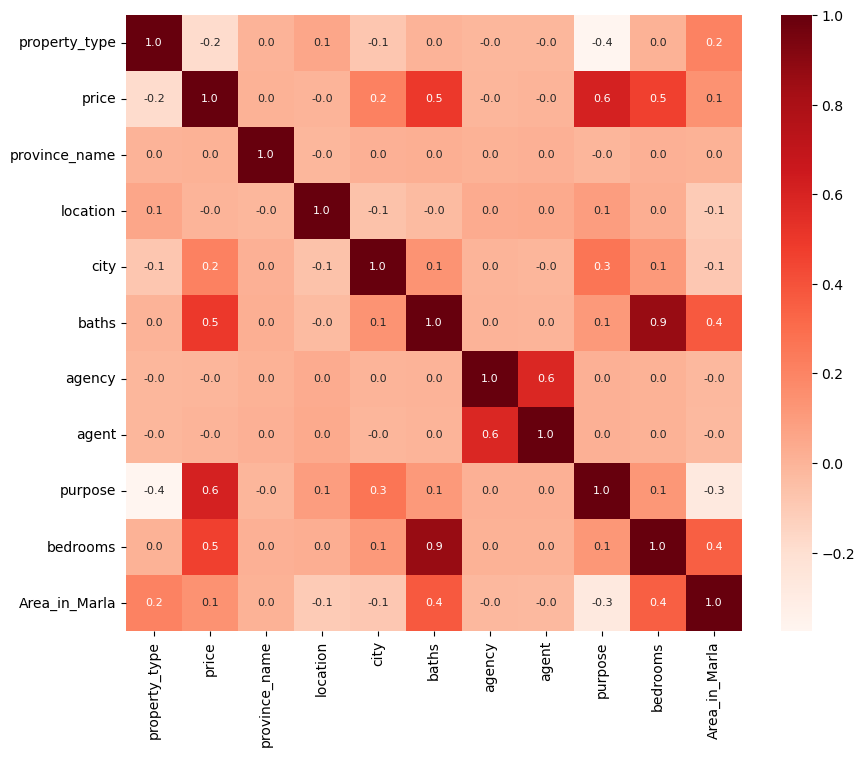

In [9]:
df_Corr=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_Corr, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':8}, cmap='Reds')

In [10]:
df = df.drop(['province_name','agency','agent'], axis=1)

<Axes: >

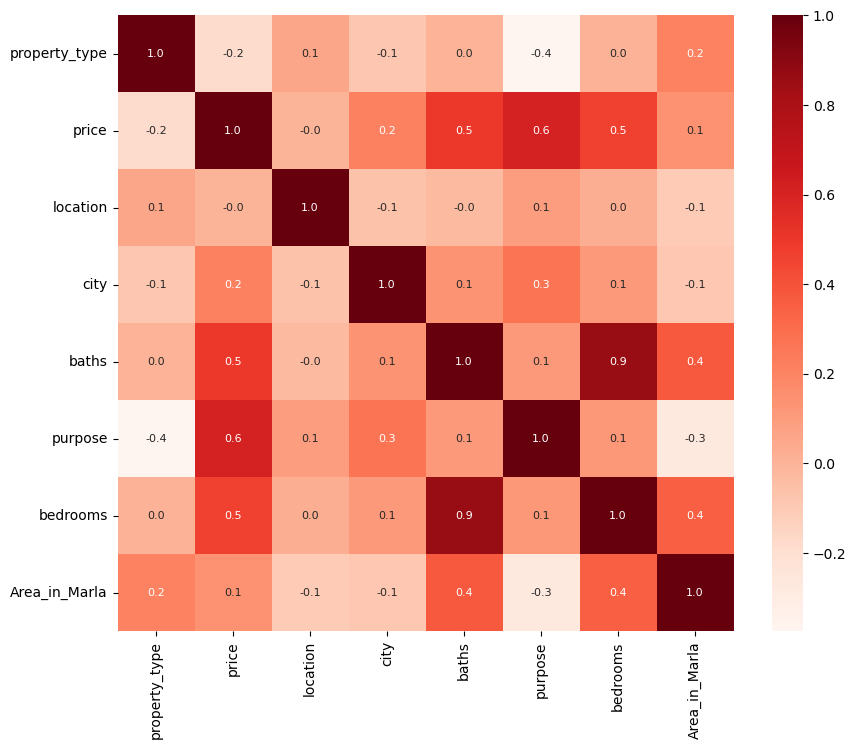

In [11]:
df_Corr=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_Corr, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':8}, cmap='Reds')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   location       99499 non-null  int64  
 3   city           99499 non-null  int64  
 4   baths          99499 non-null  float64
 5   purpose        99499 non-null  int64  
 6   bedrooms       99499 non-null  float64
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 6.8 MB


## <h2 style="text-align: center; color:green;">Centralization<h2>

In [13]:
X = df.drop(['bedrooms'], axis=1)
Y = df['bedrooms']
X.head()

,property_type,price,location,city,baths,purpose,Area_in_Marla
0,1,10000000.0,452,1,2.0,1,4.0
1,1,6900000.0,382,1,3.0,1,5.6
2,2,16500000.0,457,1,6.0,1,8.0
3,2,43500000.0,198,1,4.0,1,40.0
4,2,7000000.0,327,1,3.0,1,8.0


## <h2 style="text-align: center; color:green;">Standardize<h2>

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:1]

array([[-0.87253   , -0.03526468, -0.19680575, -1.23400772, -1.03791608,
         0.63438258, -0.63718226]])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  int64  
 1   price          99499 non-null  float64
 2   location       99499 non-null  int64  
 3   city           99499 non-null  int64  
 4   baths          99499 non-null  float64
 5   purpose        99499 non-null  int64  
 6   bedrooms       99499 non-null  float64
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 6.8 MB


## <h2 style="text-align: center; color:green;">Principal Component Analysis (PCA)<h2>

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape

(99499, 7)

## <h2 style="text-align: center; color:green;">Data Splitting<h2>

In [17]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X_pca,Y, test_size = 0.2, random_state=20)

In [18]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  79599
Size of Train Y =  79599
Size of Test X =  19900
Size of Test Y =  19900


# <h1 style="text-align: center; color:Blue;"><b>Classification Models</b><h1>

## <h2 style="text-align: center; color:red;">Logistic Regression<h2>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
from sklearn.linear_model import LogisticRegression
Code_Buddies = LogisticRegression()
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
LogisticRegression()

LogisticRegression()

### <h3 style="text-align: center; color:Green;">Finding Traning Accuracy<h3>

In [21]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[3. 6. 5. ... 2. 3. 5.]


In [22]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7028322714387855
Mean Absolute Error :  0.34931343358584904


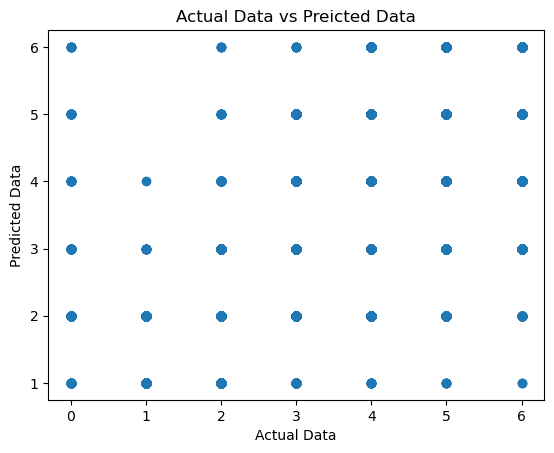

In [23]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Preicted Data")
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[    0,    39,    83,    55,    17,    31,     6],
       [    0,  1587,   764,    15,     1,     0,     0],
       [    0,   679, 15353,  2495,    57,    19,     4],
       [    0,    60,  1926, 23643,  2215,   135,     7],
       [    0,    10,   603,  4679,  5592,  2862,   178],
       [    0,     5,   124,   706,  2076,  7763,   819],
       [    0,     2,    54,   316,   371,  2718,  1530]])

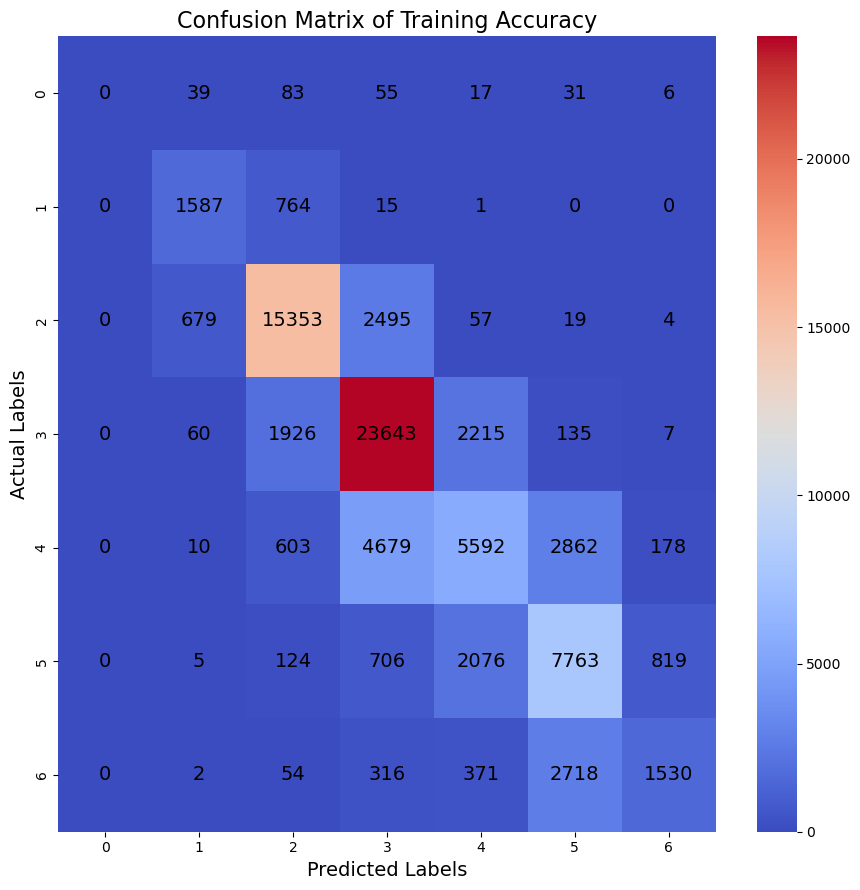

In [25]:
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=True,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'black'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Training Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [26]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [27]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7072595048050374
Mean Absolute Error :  0.34934673366834174


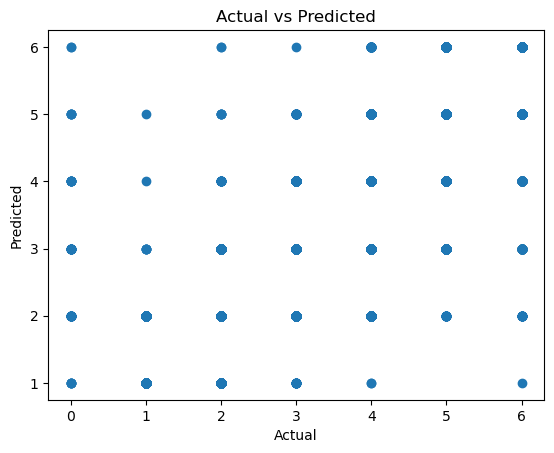

In [28]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

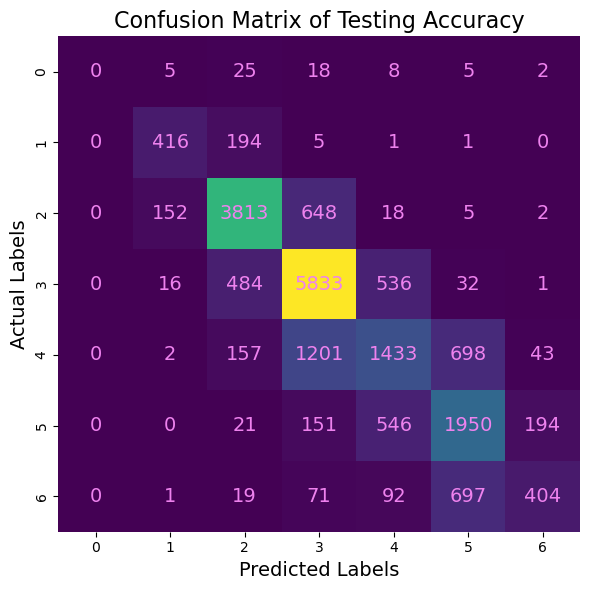

In [29]:
cm = confusion_matrix(Y_TEST, Y_Pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'violet'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Testing Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Classification Report<h3>

In [30]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, Y_Pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.70      0.67      0.69       617
         2.0       0.81      0.82      0.82      4638
         3.0       0.74      0.85      0.79      6902
         4.0       0.54      0.41      0.46      3534
         5.0       0.58      0.68      0.62      2862
         6.0       0.63      0.31      0.42      1284

    accuracy                           0.70     19900
   macro avg       0.57      0.53      0.54     19900
weighted avg       0.69      0.70      0.68     19900



## <h2 style="text-align: center; color:red;">Gaussain Naive Bayes<h2>

In [31]:
from sklearn.naive_bayes import GaussianNB
Code_Buddies_GNB = GaussianNB()
Code_Buddies_GNB.fit(X_TRAIN, Y_TRAIN)
GaussianNB()

GaussianNB()

### <h3 style="text-align: center; color:Green;">Finding Traning Accuracy<h3>

In [32]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[3. 6. 5. ... 2. 3. 5.]


In [33]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7028322714387855
Mean Absolute Error :  0.34931343358584904


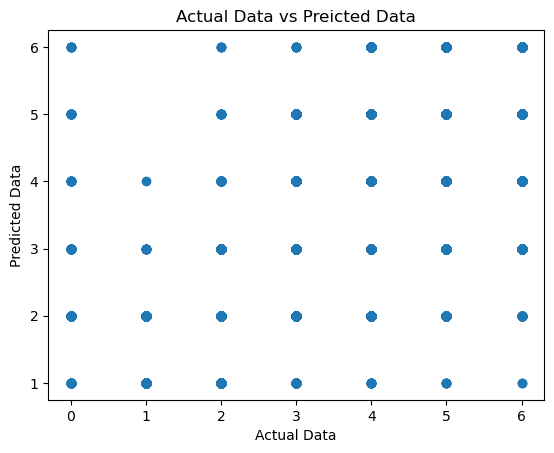

In [34]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Preicted Data")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[    0,    39,    83,    55,    17,    31,     6],
       [    0,  1587,   764,    15,     1,     0,     0],
       [    0,   679, 15353,  2495,    57,    19,     4],
       [    0,    60,  1926, 23643,  2215,   135,     7],
       [    0,    10,   603,  4679,  5592,  2862,   178],
       [    0,     5,   124,   706,  2076,  7763,   819],
       [    0,     2,    54,   316,   371,  2718,  1530]])

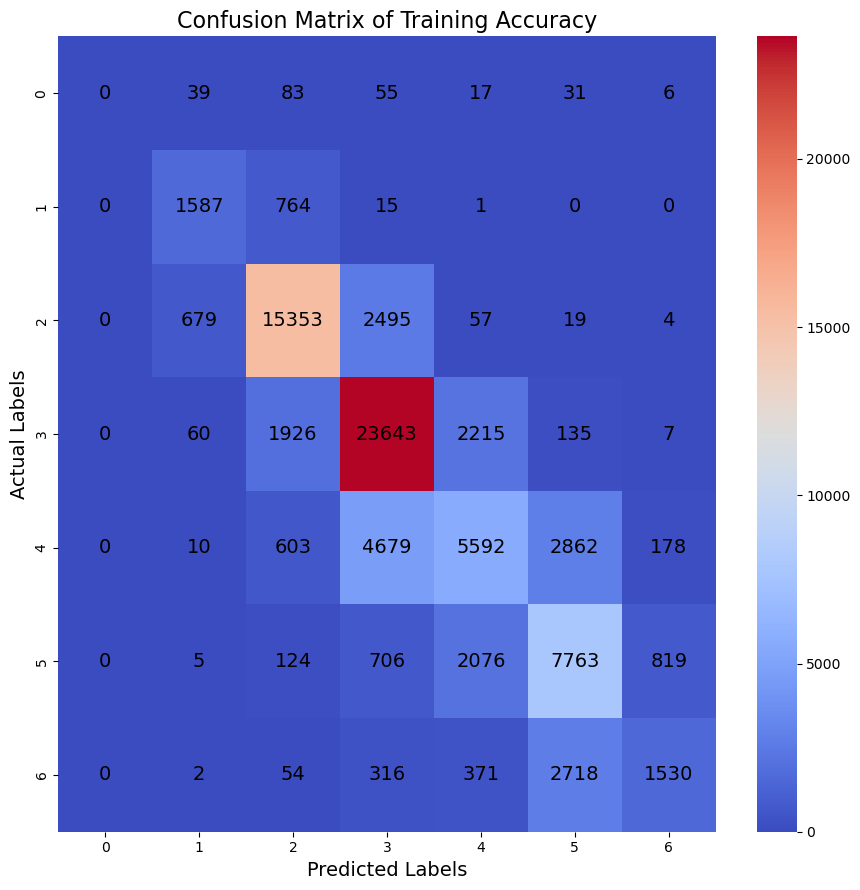

In [36]:
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=True,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'black'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Training Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [37]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [38]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7072595048050374
Mean Absolute Error :  0.34934673366834174


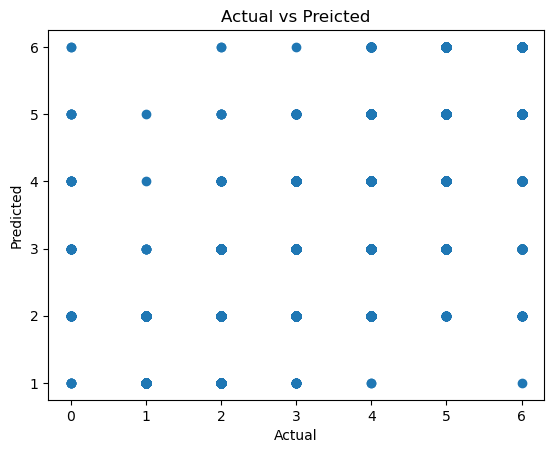

In [39]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

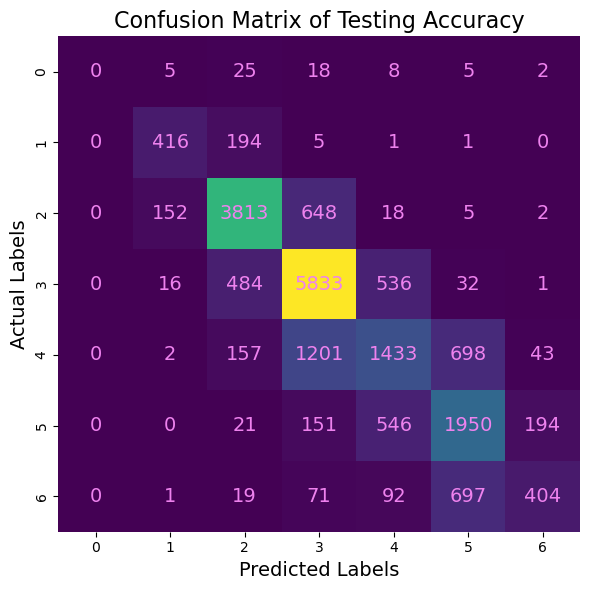

In [40]:
cm = confusion_matrix(Y_TEST, Y_Pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'violet'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Testing Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Classification Report<h3>

In [41]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, Y_Pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.70      0.67      0.69       617
         2.0       0.81      0.82      0.82      4638
         3.0       0.74      0.85      0.79      6902
         4.0       0.54      0.41      0.46      3534
         5.0       0.58      0.68      0.62      2862
         6.0       0.63      0.31      0.42      1284

    accuracy                           0.70     19900
   macro avg       0.57      0.53      0.54     19900
weighted avg       0.69      0.70      0.68     19900



## <h2 style="text-align: center; color:red;">Support Vector Machine (SVM)<h2>

In [42]:
from sklearn.svm import SVC
Code_Buddies = SVC(kernel='linear')
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
SVC(kernel='linear')

SVC(kernel='linear')

### <h3 style="text-align: center; color:Green;">Finding Traning Accuracy<h3>

In [43]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[3. 5. 5. ... 2. 3. 5.]


In [44]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.6996140790165091
Mean Absolute Error :  0.35869797359263306


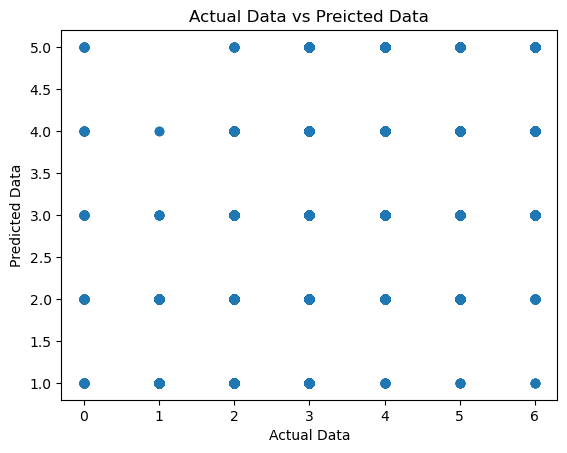

In [45]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Preicted Data")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[    0,    56,    66,    46,    27,    36,     0],
       [    0,  1984,   371,    10,     2,     0,     0],
       [    0,  1111, 15054,  2306,   112,    24,     0],
       [    0,   157,  1877, 20222,  5300,   430,     0],
       [    0,    30,   618,  1039,  8776,  3461,     0],
       [    0,     7,   125,   443,  2337,  8581,     0],
       [    0,     5,    56,   219,   408,  4303,     0]])

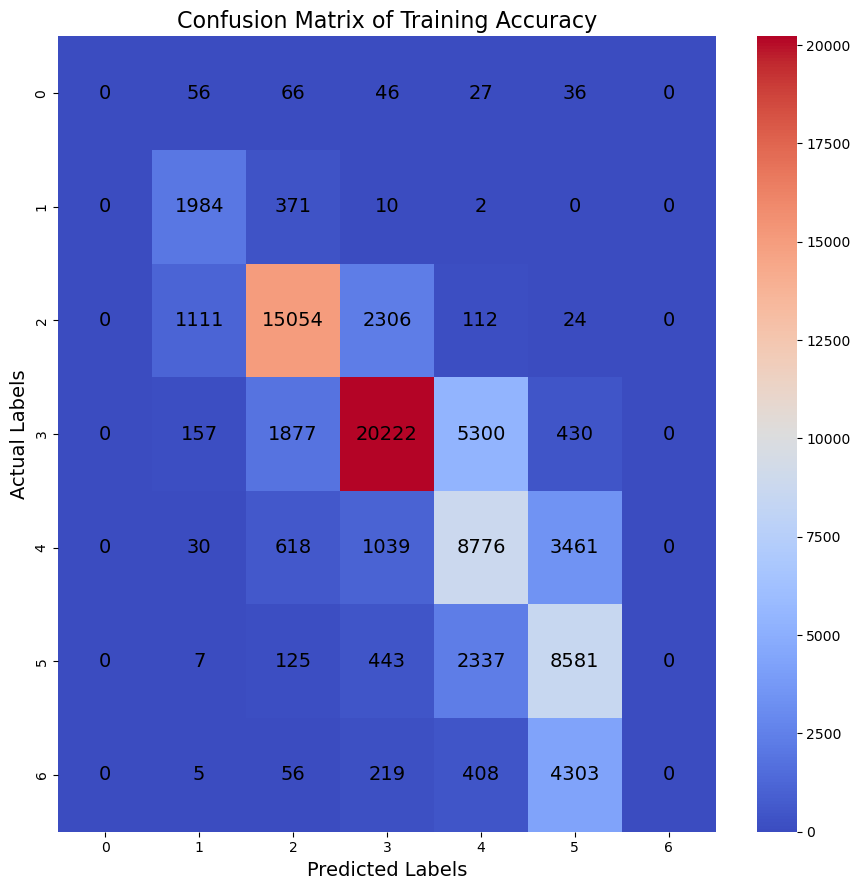

In [47]:
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=True,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'black'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Training Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [48]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [49]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7016783902370163
Mean Absolute Error :  0.36085427135678394


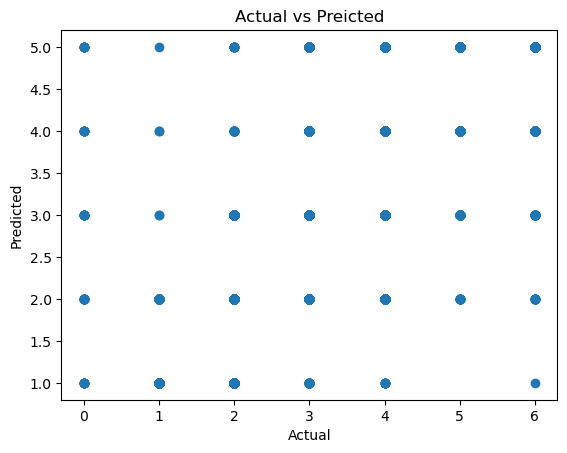

In [50]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

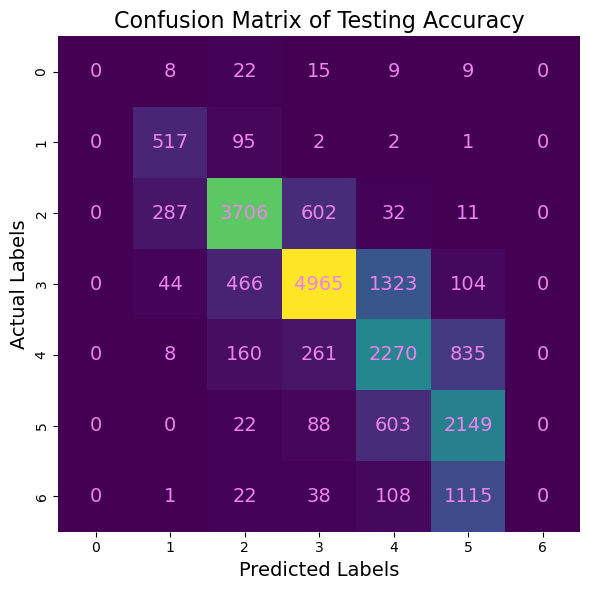

In [51]:
cm = confusion_matrix(Y_TEST, Y_Pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'violet'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Testing Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Classification Report<h3>

In [52]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, Y_Pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.60      0.84      0.70       617
         2.0       0.82      0.80      0.81      4638
         3.0       0.83      0.72      0.77      6902
         4.0       0.52      0.64      0.58      3534
         5.0       0.51      0.75      0.61      2862
         6.0       0.00      0.00      0.00      1284

    accuracy                           0.68     19900
   macro avg       0.47      0.54      0.49     19900
weighted avg       0.67      0.68      0.67     19900



## <h2 style="text-align: center; color:red;">Decision Tree<h2>

In [53]:
from sklearn.tree import DecisionTreeClassifier
Code_Buddies = DecisionTreeClassifier(random_state=20)
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
DecisionTreeClassifier(random_state=20)

DecisionTreeClassifier(random_state=20)

### <h3 style="text-align: center; color:Green;">Finding Training Accuracy<h3>

In [54]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[3. 6. 5. ... 2. 2. 5.]


In [55]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.96035154993399
Mean Absolute Error :  0.046344803326674955


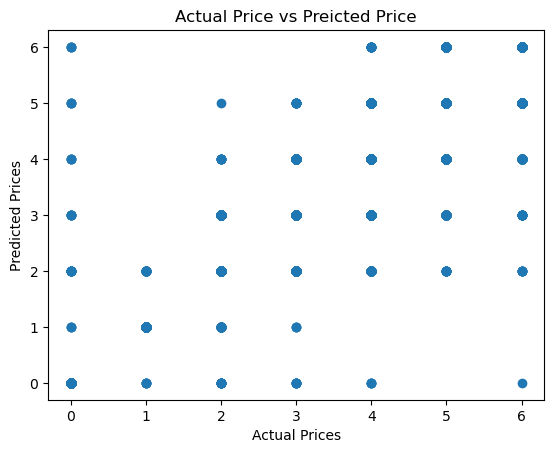

In [56]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[  196,     3,    14,     6,     4,     4,     4],
       [    5,  2325,    37,     0,     0,     0,     0],
       [   12,    48, 18399,   140,     7,     1,     0],
       [    7,     3,   418, 27359,   186,    13,     0],
       [    4,     0,    89,   587, 12842,   389,    13],
       [    0,     0,    13,    90,   491, 10760,   139],
       [    1,     0,     6,    15,    72,   388,  4509]])

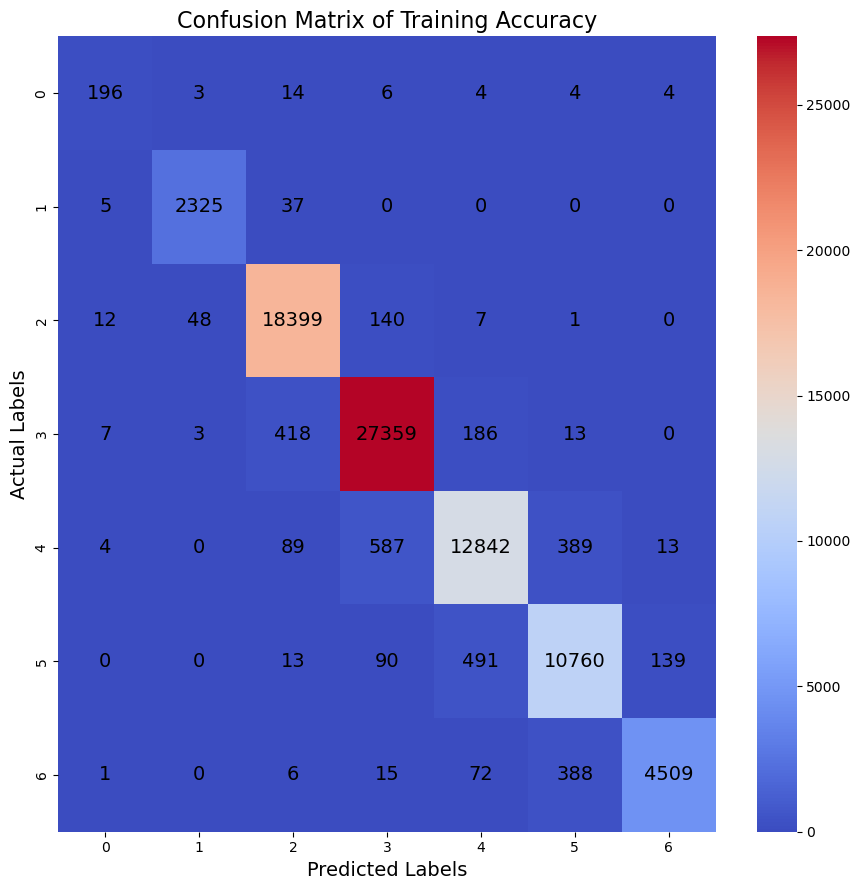

In [58]:
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=True,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'black'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Training Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [59]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [60]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7079532026609496
Mean Absolute Error :  0.30402010050251255


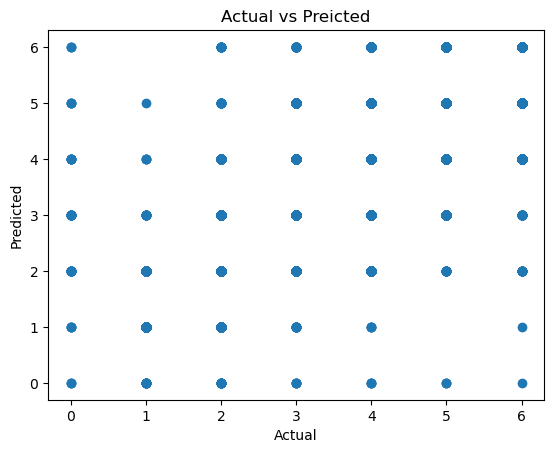

In [61]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

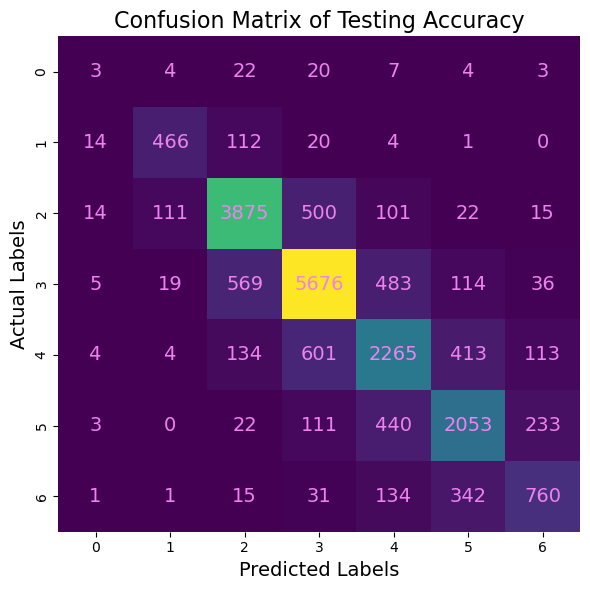

In [62]:
cm = confusion_matrix(Y_TEST, Y_Pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'violet'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Testing Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Classification Report<h3>

In [63]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, Y_Pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.07      0.05      0.06        63
         1.0       0.77      0.76      0.76       617
         2.0       0.82      0.84      0.83      4638
         3.0       0.82      0.82      0.82      6902
         4.0       0.66      0.64      0.65      3534
         5.0       0.70      0.72      0.71      2862
         6.0       0.66      0.59      0.62      1284

    accuracy                           0.76     19900
   macro avg       0.64      0.63      0.63     19900
weighted avg       0.76      0.76      0.76     19900



## <h2 style="text-align: center; color:red;">Random Forest<h2>

In [64]:
from sklearn.ensemble import RandomForestClassifier
Code_Buddies = RandomForestClassifier(n_estimators=20, random_state=20)
Code_Buddies.fit(X_TRAIN, Y_TRAIN)
RandomForestClassifier(n_estimators=20, random_state=20)

RandomForestClassifier(n_estimators=20, random_state=20)

### <h3 style="text-align: center; color:Green;">Finding Training Accuracy<h3>

In [65]:
training_data_prediction = Code_Buddies.predict(X_TRAIN)
print(training_data_prediction)

[3. 6. 5. ... 2. 2. 5.]


In [66]:
r2 = metrics.r2_score(Y_TRAIN, training_data_prediction)
MSE = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.9560952309238826
Mean Absolute Error :  0.05070415457480622


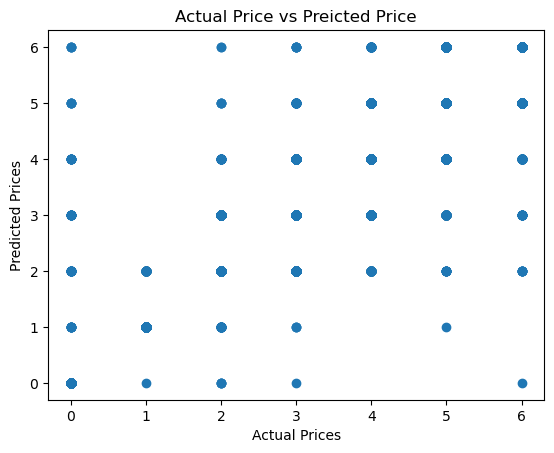

In [67]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[  170,     8,    22,    12,    10,     5,     4],
       [    1,  2301,    65,     0,     0,     0,     0],
       [    4,    33, 18251,   287,    26,     4,     2],
       [    1,     3,   351, 27263,   327,    35,     6],
       [    0,     0,    76,   524, 12754,   534,    36],
       [    0,     1,    10,    85,   380, 10790,   227],
       [    1,     0,     7,    16,    52,   339,  4576]])

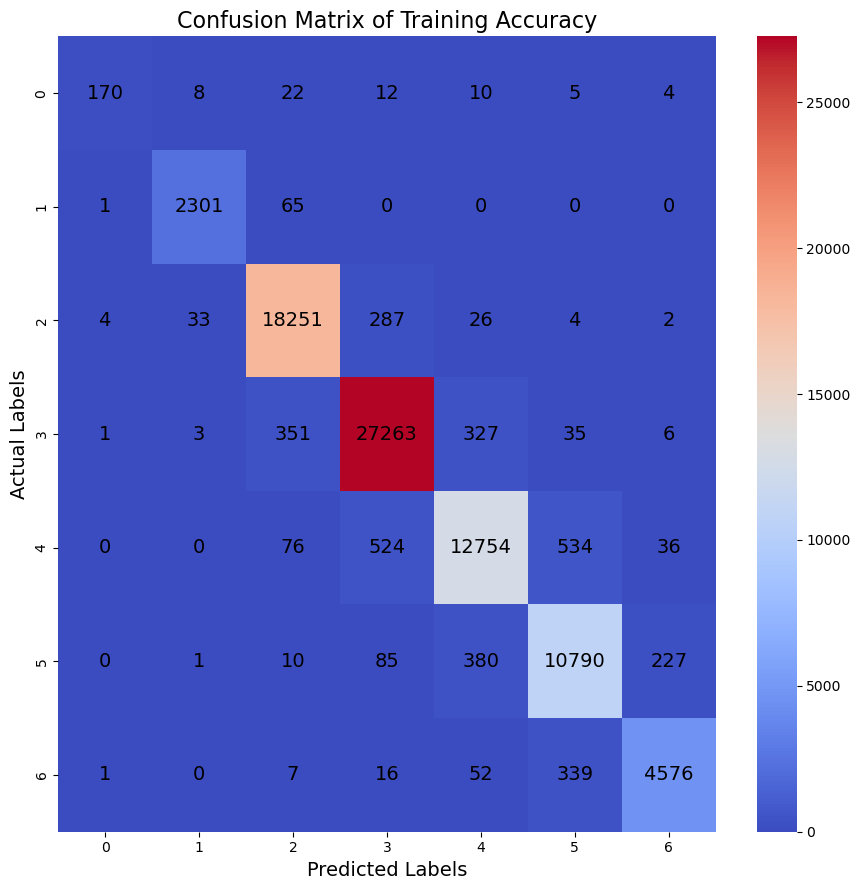

In [69]:
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=True,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'black'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Training Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Finding Testing Accuracy<h3>

In [70]:
Y_Pred = Code_Buddies.predict(X_TEST)

In [71]:
r2 = metrics.r2_score(Y_TEST, Y_Pred)
MSE = metrics.mean_absolute_error(Y_TEST, Y_Pred)
print('R2(Squared) Score : ', r2)
print('Mean Absolute Error : ', MSE)

R2(Squared) Score :  0.7517507627455902
Mean Absolute Error :  0.26849246231155777


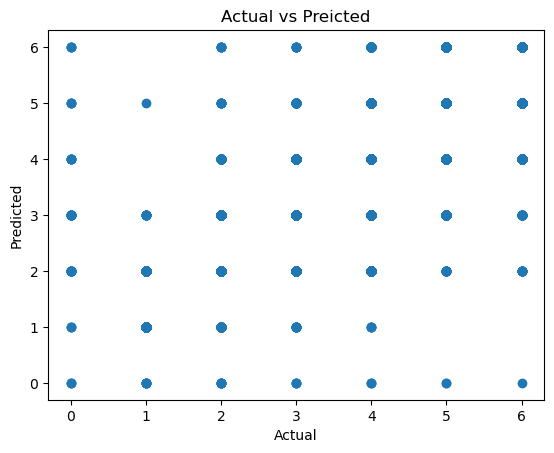

In [72]:
plt.scatter(Y_TEST, Y_Pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

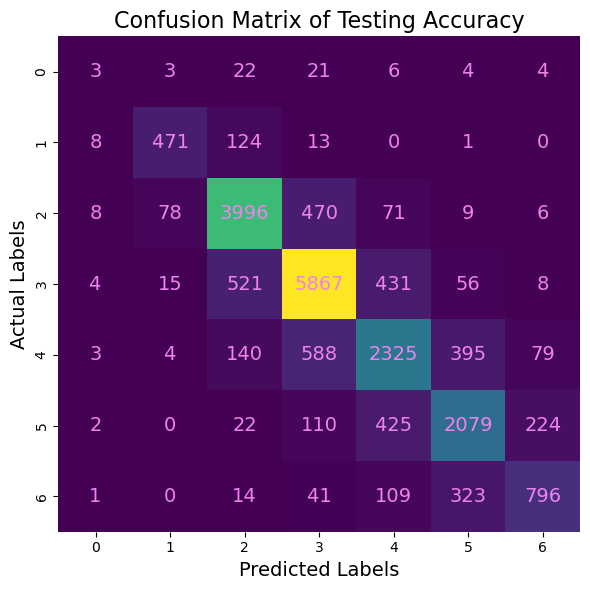

In [73]:
cm = confusion_matrix(Y_TEST, Y_Pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False,
            xticklabels=['0', '1', '2' ,'3','4','5','6'],
            yticklabels=['0', '1', '2' ,'3','4','5','6'], annot_kws={'size': 14, 'color': 'violet'})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix of Testing Accuracy', fontsize=16)
plt.tight_layout()
plt.show()

### <h3 style="text-align: center; color:Green;">Classification Report<h3>

In [74]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, Y_Pred, zero_division=0)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.10      0.05      0.07        63
         1.0       0.82      0.76      0.79       617
         2.0       0.83      0.86      0.84      4638
         3.0       0.83      0.85      0.84      6902
         4.0       0.69      0.66      0.67      3534
         5.0       0.73      0.73      0.73      2862
         6.0       0.71      0.62      0.66      1284

    accuracy                           0.78     19900
   macro avg       0.67      0.65      0.66     19900
weighted avg       0.78      0.78      0.78     19900



### <h1 style="text-align: center; color:red;">ANN<h1>

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_TRAIN.shape[1],)),  # Explicit Input layer
    Dense(32, activation='relu'),  # Input layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(len(Y.unique()), activation='sigmoid')  # Output layer (number of classes)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])
history=model.fit(X_TRAIN, Y_TRAIN, epochs=30, batch_size=32, validation_split=0.2)
Training_loss, Training_accuracy = model.evaluate(X_TRAIN, Y_TRAIN)
print("Train Loss : ",Training_loss)
print("Train Accuracy : ",Training_accuracy)
Testing_loss,Testing_accuracy = model.evaluate(X_TEST, Y_TEST)
print("Test Loss : ",Testing_loss)
print("Test Accuracy : ",Testing_accuracy)

Epoch 1/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5779 - loss: 1.1398 - val_accuracy: 0.7186 - val_loss: 0.7752
Epoch 2/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7272 - loss: 0.7497 - val_accuracy: 0.7329 - val_loss: 0.7437
Epoch 3/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7303 - loss: 0.7299 - val_accuracy: 0.7336 - val_loss: 0.7285
Epoch 4/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7380 - loss: 0.7137 - val_accuracy: 0.7412 - val_loss: 0.7162
Epoch 5/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7420 - loss: 0.6999 - val_accuracy: 0.7410 - val_loss: 0.7071
Epoch 6/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7440 - loss: 0.6903 - val_accuracy: 0.7413 - val_loss: 0.7035
Epoch 7/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7435 - loss: 0.6905 - val_accuracy: 0.7441 - val_loss: 0.6969
Epoch 8/30
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7494 - loss: 0.6798 -

The performance of the models varies in terms of accuracy and generalization. Logistic Regression and Gaussian Naive Bayes provide stable results with testing R2 scores around 0.70 and MAE around 0.35. Support Vector Machine (SVM) shows a slightly lower performance with an accuracy of 68% and challenges with certain classes. Decision Tree and Random Forest demonstrate the highest training R2 scores (around 0.96), with Random Forest performing best on testing data (R2 of 0.75 and MAE of 0.27). The Artificial Neural Network (ANN) provides good generalization, with a testing accuracy of 75.8%.

Despite class imbalances, Random Forest and Decision Tree are the most robust models, while ANN offers strong generalization.

<b>In conclusion</b>, while each model exhibits strengths in different areas, Random Forest and Decision Tree emerge as the most reliable performers, offering the best balance of accuracy and generalization. Future work may focus on refining these models and addressing class imbalances to further enhance their predictive power.